In [ ]:
# 1. Prepare Problem
# a) Load libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
# b) Load dataset
# Data Dictionary: https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset
df = pd.read_csv("https://raw.githubusercontent.com/fenago/introml/main/Life%20Expectancy%20Data.csv")
df.head()
df.sample(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
633,Costa Rica,2007,Developing,78.9,93.0,1,4.20,150.889148,89.0,0,...,89.0,8.37,89.0,0.1,612.623418,4369469.0,1.9,1.9,0.734,12.8
709,Democratic People's Republic of Korea,2011,Developing,69.4,153.0,8,3.39,0.000000,94.0,0,...,99.0,NaN,94.0,0.1,NaN,NaN,5.1,5.2,NaN,NaN
2570,Thailand,2014,Developing,74.6,152.0,8,6.41,789.077295,99.0,0,...,99.0,4.12,99.0,0.1,5941.847100,68416772.0,7.8,7.8,0.737,13.6
2746,United Arab Emirates,2015,Developing,77.1,75.0,1,NaN,0.000000,99.0,347,...,99.0,NaN,99.0,0.1,3911.746890,NaN,5.3,5.1,0.836,13.3
1490,Liberia,2015,Developing,61.4,259.0,8,NaN,0.000000,52.0,1060,...,52.0,NaN,52.0,0.9,452.387170,4499621.0,6.5,6.4,0.427,9.9


In [ ]:
# Basic Data Cleaning
df.columns = df.columns.str.lower().str.replace(' ', '_') # A
 
string_columns = list(df.dtypes[df.dtypes == 'object'].index) # B
 
for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_') # C
df = df.rename(columns=lambda x: x.strip())
df.sample(5)

,country,year,status,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,...,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling
364,brazil,2003,developing,71.8,172.0,88,6.95,15.857812,97.0,2,...,99.0,6.94,99.0,0.1,359.587582,182482149.0,3.3,3.3,0.699,14.8
1026,greece,2015,developing,81.0,72.0,0,NaN,0.000000,96.0,1,...,99.0,NaN,99.0,0.1,187.789910,182883.0,0.8,0.7,0.865,17.2
351,botswana,2000,developing,47.8,647.0,2,5.37,250.891648,86.0,2672,...,97.0,4.64,97.0,38.8,3349.688230,172834.0,12.3,12.2,0.559,11.7
2543,syrian_arab_republic,2009,developing,73.8,124.0,7,0.81,0.000000,84.0,22,...,83.0,3.55,8.0,0.1,NaN,2824893.0,6.4,6.2,0.648,11.8
2328,singapore,2000,developed,78.3,78.0,0,2.03,1855.828806,97.0,141,...,98.0,2.71,98.0,0.1,23792.677000,NaN,2.1,2.0,0.810,12.5


In [ ]:
# Set the Environment
# Ignore Warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Write out the versions of all packages to requirements.txt
!pip freeze >> requirements.txt

# Remove the restriction on Jupyter that limits the columns displayed (the ... in the middle)
pd.set_option('max_columns',None)
# Docs: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html#

# Pretty Display of variables.  for instance, you can call df.head() and df.tail() in the same cell and BOTH display w/o print
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# List of ALL Magic Commands.  To run a magic command %var  --- i.e.:  %env
%lsmagic
# %env  -- list environment variables
# %%time  -- gives you information about how long a cel took to run
# %%timeit -- runs a cell 100,000 times and then gives you the average time the cell will take to run (can be LONG)
# %pdb -- python debugger

# to display nice model diagram
from sklearn import set_config
set_config(display='diagram')

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

print(np.__version__)
print(sklearn.__version__)

1.21.6
1.0.2


In [ ]:
df.sample(5)

,country,year,status,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,_bmi_,under-five_deaths_,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling
2055,portugal,2015,developed,81.1,76.0,0,NaN,0.000000,98.0,8,61.6,0,98.0,NaN,98.0,0.1,1922.681000,135876.0,0.7,0.5,0.841,16.6
1567,madagascar,2002,developing,59.3,271.0,41,0.90,47.526214,51.0,10795,14.7,63,61.0,5.29,62.0,0.7,262.285948,16765117.0,8.5,8.4,0.462,8.3
2464,sudan,2008,developing,61.8,251.0,64,2.01,128.636271,78.0,129,NaN,95,85.0,8.17,86.0,0.3,1291.528826,32955496.0,NaN,NaN,0.444,6.3
927,finland,2002,developing,78.1,98.0,0,9.25,3099.357319,NaN,0,56.6,0,95.0,7.81,98.0,0.1,26834.262500,52598.0,0.9,0.8,0.863,18.0
1952,pakistan,2005,developing,62.9,2.0,364,0.04,30.593208,7.0,2981,18.9,459,78.0,2.91,77.0,0.1,711.469946,15399667.0,21.2,21.7,0.487,6.1


In [ ]:
%%time
# 2. Structural Investigation of the Data
# a) Basic data queries
df.sample(3)

CPU times: user 882 µs, sys: 0 ns, total: 882 µs
Wall time: 870 µs


,country,year,status,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,_bmi_,under-five_deaths_,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling
2251,senegal,2013,developing,66.0,196.0,20,0.26,11.838532,92.0,17,23.2,28,89.0,4.51,92.0,0.3,148.912351,141232.0,9.9,9.7,0.474,8.7
2299,sierra_leone,2013,developing,54.0,47.0,23,0.01,1.321464,92.0,15,23.3,33,92.0,11.59,92.0,0.8,71.818700,692279.0,7.7,7.6,0.413,9.3
2751,united_arab_emirates,2010,developing,76.2,82.0,1,1.69,308.066074,94.0,87,55.8,1,94.0,3.93,94.0,0.1,3549.148320,NaN,5.1,4.9,0.826,13.3


In [ ]:
# Show size of the dataset
print("Rows and Columns: \n", df.shape, "\n")
print("General Information: \n", df.info(), "\n")
# b) Validate and change all data types
print(df.dtypes)

Rows and Columns: 
 (2938, 22) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country                          2938 non-null   object 
 1   year                             2938 non-null   int64  
 2   status                           2938 non-null   object 
 3   life_expectancy_                 2928 non-null   float64
 4   adult_mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   hepatitis_b                      2385 non-null   float64
 9   measles_                         2938 non-null   int64  
 10  _bmi_                            2904 non-null   float64
 11  under-five_deaths_               2938 non-null   

In [ ]:
# IMPORTANT:  Change data types to the correct data types
# EXAMPLE of one but you may have to repeat this process
# Change data type of 'sex_of_Driver'
df['measles_'] = df['measles_'].astype('int64')
# df["cubicinches"]=pd.to_numeric(df["cubicinches"], errors='coerce')
# df["weightlbs"]=pd.to_numeric(df["weightlbs"], errors='coerce')

In [ ]:
# Treat obviously incorrect values in your dataset

# If you have values in your columns that you want to replace - use this for loop
# For instance - in the CreditScoring dataset - there are numerous 99999999 that need to be replaced

# for c in ['income', 'assets', 'debt']:
#    df[c] = df[c].replace(to_replace=99999999, value=np.nan)

In [ ]:
# Count how many times each data type is present in the dataset
pd.value_counts(df.dtypes)

float64    16
int64       4
object      2
dtype: int64

In [ ]:
# How many unique values per feature
df.nunique().to_frame()

,0
country,193
year,16
status,2
life_expectancy_,362
adult_mortality,425
infant_deaths,209
alcohol,1076
percentage_expenditure,2328
hepatitis_b,87
measles_,958


In [ ]:
df.dtypes.to_frame()

,0
country,object
year,int64
status,object
life_expectancy_,float64
adult_mortality,float64
infant_deaths,int64
alcohol,float64
percentage_expenditure,float64
hepatitis_b,float64
measles_,int64


In [ ]:
# c) Split into Numeric List and Categorical List
# Split the data into numeric and categorical lists and dataframes
numerics = ['int16','int32','int64','float64']
catDF = df.select_dtypes(exclude=numerics)
numDF = df.select_dtypes(include=numerics)
catDF.head()
numDF.head()

,country,status
0,afghanistan,developing
1,afghanistan,developing
2,afghanistan,developing
3,afghanistan,developing
4,afghanistan,developing


,year,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,_bmi_,under-five_deaths_,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
# This is how you merge the datasets back together:
# Merge back into a single df
# preparing the X Variables  (Don't forget ot remove the target!!)
X = pd.concat([catDF,numDF],axis=1)
print(X.shape)

# This is how you extract the target variable
# y = df_X['Sex_of_Driver']
# X.drop(['Sex_of_Driver'],axis=1,inplace=True)

(2938, 22)


In [ ]:
# 3. Qualitative Investigation of the Data
# a) Duplicates
# df.duplicated()
df.duplicated().sum()

0

In [ ]:
# Duplicated Rows?
df[df.duplicated()]

,country,year,status,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,_bmi_,under-five_deaths_,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling


In [ ]:
# df_unique = df.drop_duplicates(keep='first')
# df.drop_duplicates(keep='first')

In [ ]:
# Check number of duplicates while ignoring the index feature
n_duplicates = df.drop(labels=['status'], axis=1).duplicated().sum()

print(f"You seem to have {n_duplicates} duplicates in your database.")

#  Extract column names of all features, except 'Accident_Index'
columns_to_consider = df.drop(labels=['status'], axis=1).columns

# Drop duplicates based on 'columns_to_consider'
df.drop_duplicates(subset=columns_to_consider, inplace=True)
df.shape

You seem to have 0 duplicates in your database.


(2938, 22)

In [ ]:
# MISSING VALUES
# df.isna()
df.isna().sum()

# Check for missing values in a single column
# df[df['Description'].isna()]

# List all rows that are missing a value in this field
# df.dropna(subset=['Description'])  

# Drop all rows that are missing a value in this field:
# df.dropna(subset=['Description'], inplace=True)

country                              0
year                                 0
status                               0
life_expectancy_                    10
adult_mortality                     10
infant_deaths                        0
alcohol                            194
percentage_expenditure               0
hepatitis_b                        553
measles_                             0
_bmi_                               34
under-five_deaths_                   0
polio                               19
total_expenditure                  226
diphtheria_                         19
_hiv/aids                            0
gdp                                448
population                         652
_thinness__1-19_years               34
_thinness_5-9_years                 34
income_composition_of_resources    167
schooling                          163
dtype: int64

In [ ]:
df[df['alcohol'].isna()]

,country,year,status,life_expectancy_,adult_mortality,infant_deaths,alcohol,percentage_expenditure,hepatitis_b,measles_,_bmi_,under-five_deaths_,polio,total_expenditure,diphtheria_,_hiv/aids,gdp,population,_thinness__1-19_years,_thinness_5-9_years,income_composition_of_resources,schooling
32,algeria,2015,developing,75.6,19.0,21,NaN,0.0,95.0,63,59.5,24,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
48,angola,2015,developing,52.4,335.0,66,NaN,0.0,64.0,118,23.3,98,7.0,NaN,64.0,1.9,3695.793748,2785935.0,8.3,8.2,0.531,11.4
64,antigua_and_barbuda,2015,developing,76.4,13.0,0,NaN,0.0,99.0,0,47.7,0,86.0,NaN,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
80,argentina,2015,developing,76.3,116.0,8,NaN,0.0,94.0,0,62.8,9,93.0,NaN,94.0,0.1,13467.123600,43417765.0,1.0,0.9,0.826,17.3
96,armenia,2015,developing,74.8,118.0,1,NaN,0.0,94.0,33,54.9,1,96.0,NaN,94.0,0.1,369.654776,291695.0,2.1,2.2,0.741,12.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,venezuela_(bolivarian_republic_of),2015,developing,74.1,157.0,9,NaN,0.0,87.0,0,62.1,10,87.0,NaN,87.0,0.1,NaN,NaN,1.6,1.5,0.769,14.3
2874,viet_nam,2015,developing,76.0,127.0,28,NaN,0.0,97.0,256,17.5,35,97.0,NaN,97.0,0.1,NaN,NaN,14.2,14.5,0.678,12.6
2890,yemen,2015,developing,65.7,224.0,37,NaN,0.0,69.0,468,41.3,47,63.0,NaN,69.0,0.1,NaN,NaN,13.6,13.4,0.499,9.0
2906,zambia,2015,developing,61.8,33.0,27,NaN,0.0,9.0,9,23.4,40,9.0,NaN,9.0,4.1,1313.889646,161587.0,6.3,6.1,0.576,12.5


<Figure size 1080x576 with 0 Axes>

Text(0.5, 50.09375, 'Column Number')

Text(114.0, 0.5, 'Sample Number')

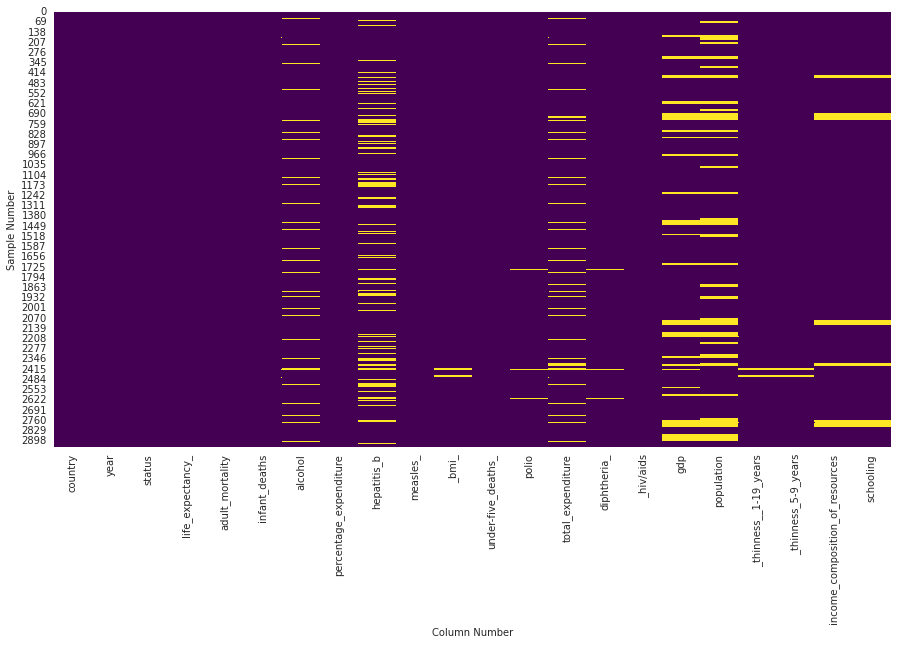

In [ ]:
# b) Missing Values per Sample (Big Holes)


plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')

g = sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
# g = sns.heatmap(df_X.loc[df_X.isnull().sum(1).sort_values(ascending=1).index].isnull(), cbar=False, cmap='viridis')
g.set_xlabel('Column Number')
g.set_ylabel('Sample Number')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


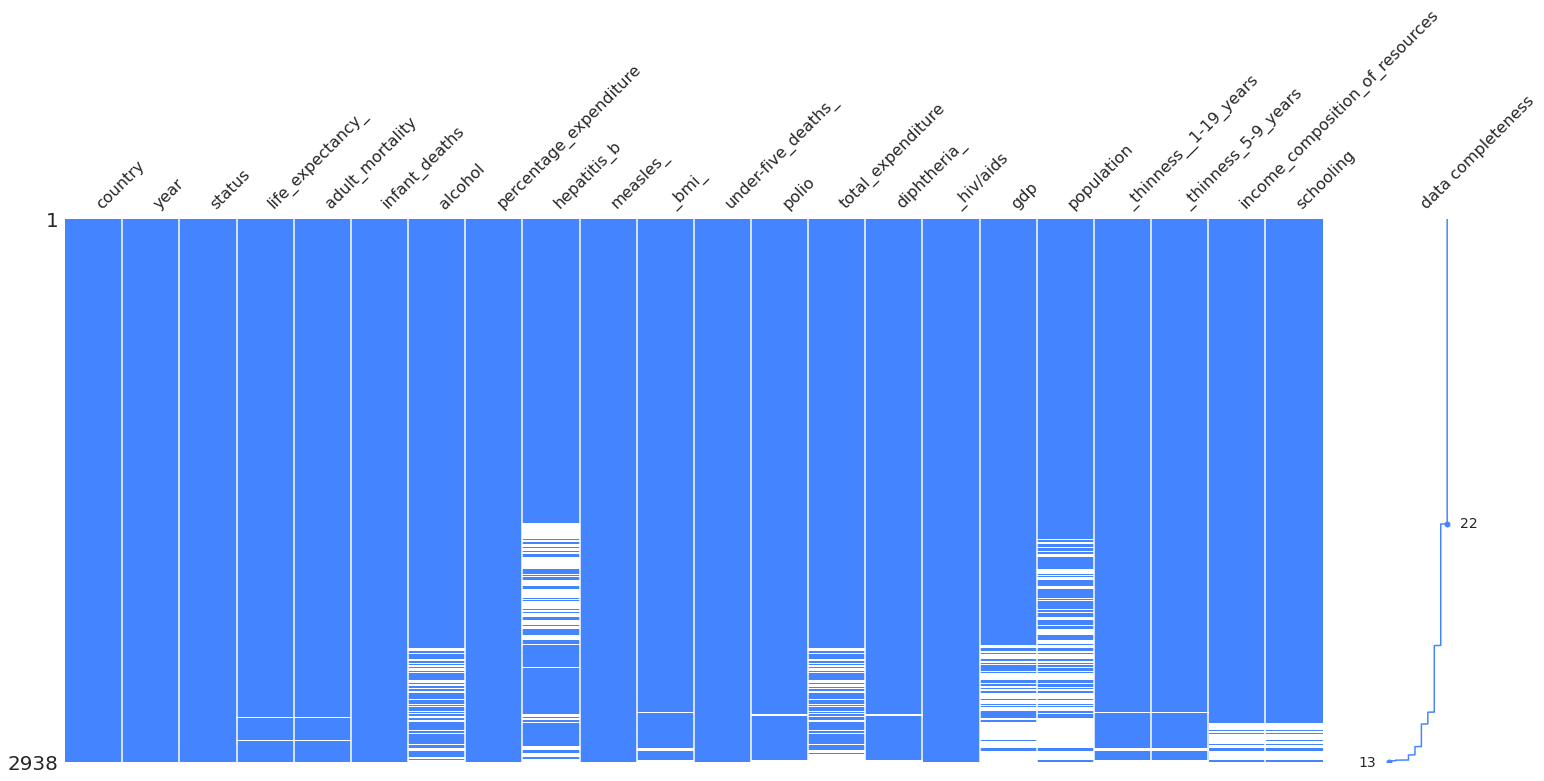

In [ ]:
!pip install missingno
import missingno as msno
msno.matrix(df, labels=True, sort='descending', color=(0.27, 0.52, 1.0));

In [ ]:
# Drop rows that are 20% or more empty (you set the threshold)
df = df.dropna(thresh=df.shape[1] * 0.80, axis=0).reset_index(drop=True)
df.shape

(2852, 22)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


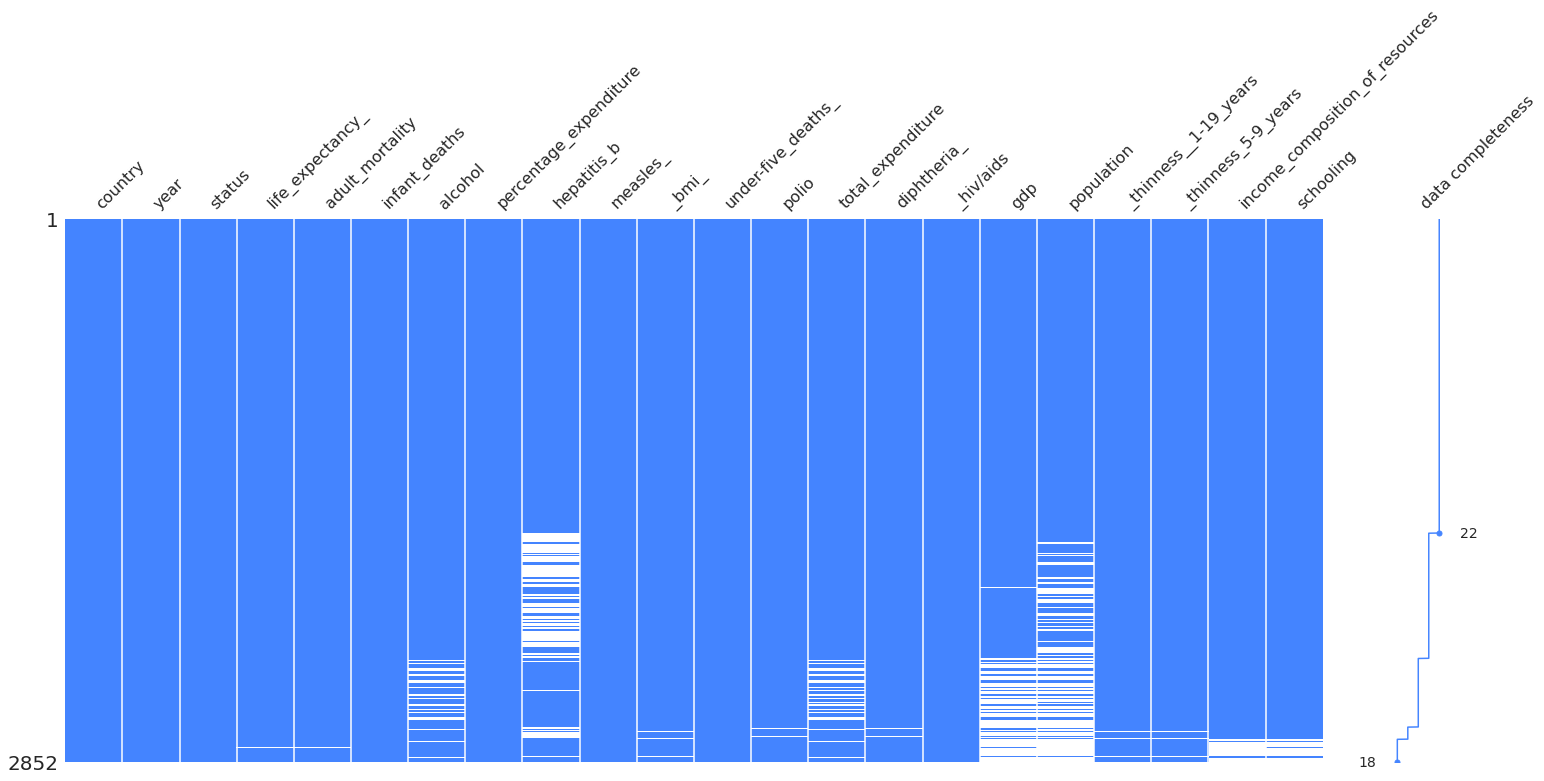

In [ ]:
!pip install missingno
import missingno as msno
msno.matrix(df, labels=True, sort='descending', color=(0.27, 0.52, 1.0));

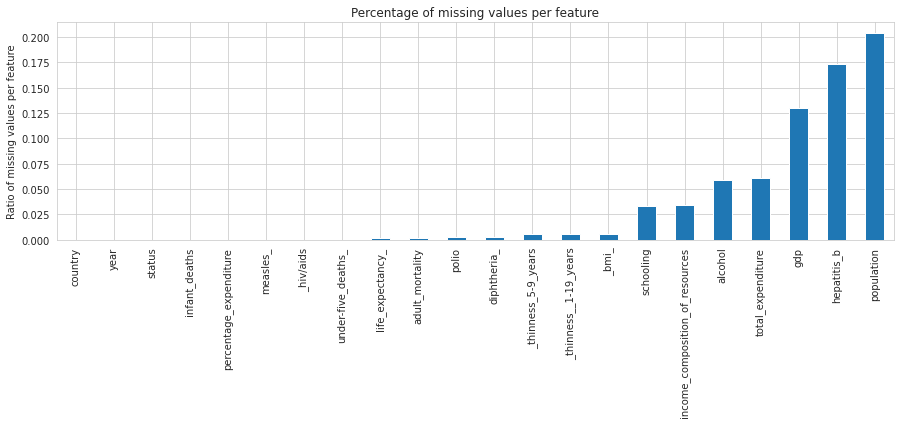

In [ ]:
# c) Missing Values per Feature (Big Holes)
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

In [ ]:
df = df.dropna(thresh=df.shape[0] * 0.85, axis=1)
df.shape

(2852, 20)

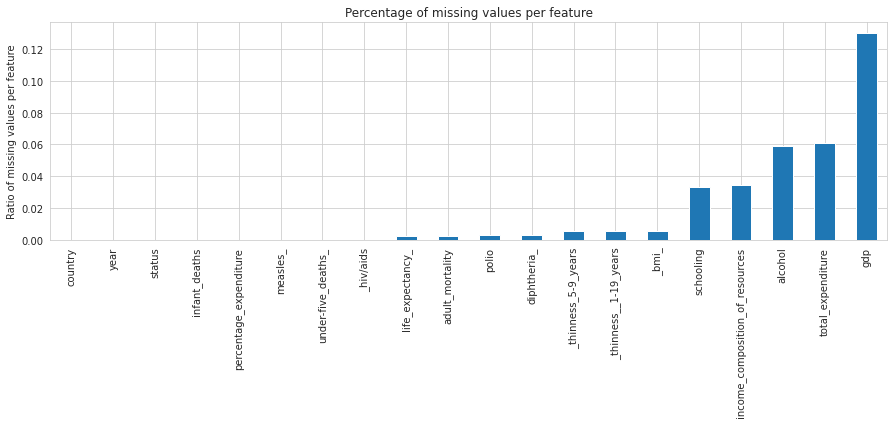

In [ ]:
# c) Missing Values per Feature (Big Holes)
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

In [ ]:
# d) Impute Values (Small Holes)
# df['CustomerID'].fillna('Missing', inplace=True)

# Replace NaN one column with the median
# df['col1'] = df['col1'].fillna(df['col1'].median())
# df = df.fillna(df.median())

# to see categorical encoding - see:  https://github.com/fenago/eda/blob/main/Cars_XGBoost.ipynb

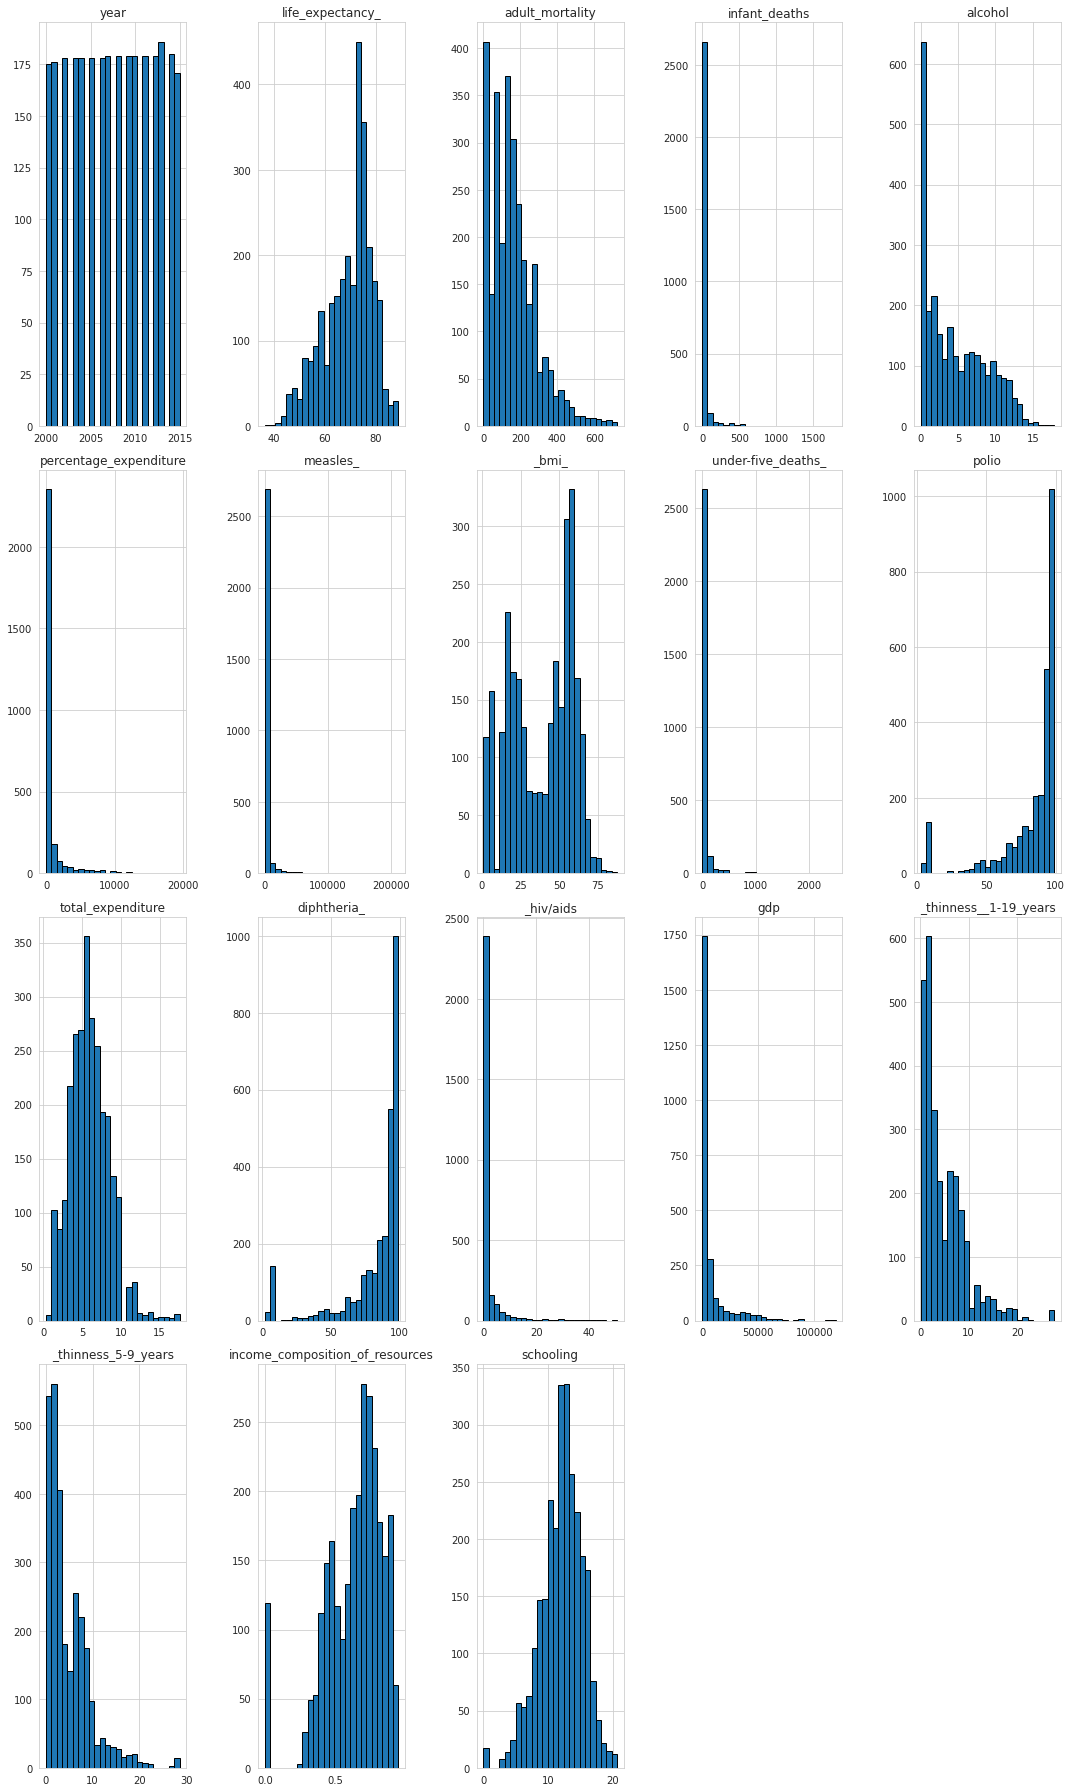

In [ ]:
# 4. Content Investigation of the Data
# a) Distributions of data in each feature
# Plots the histogram for each numerical feature in a separate subplot
df.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

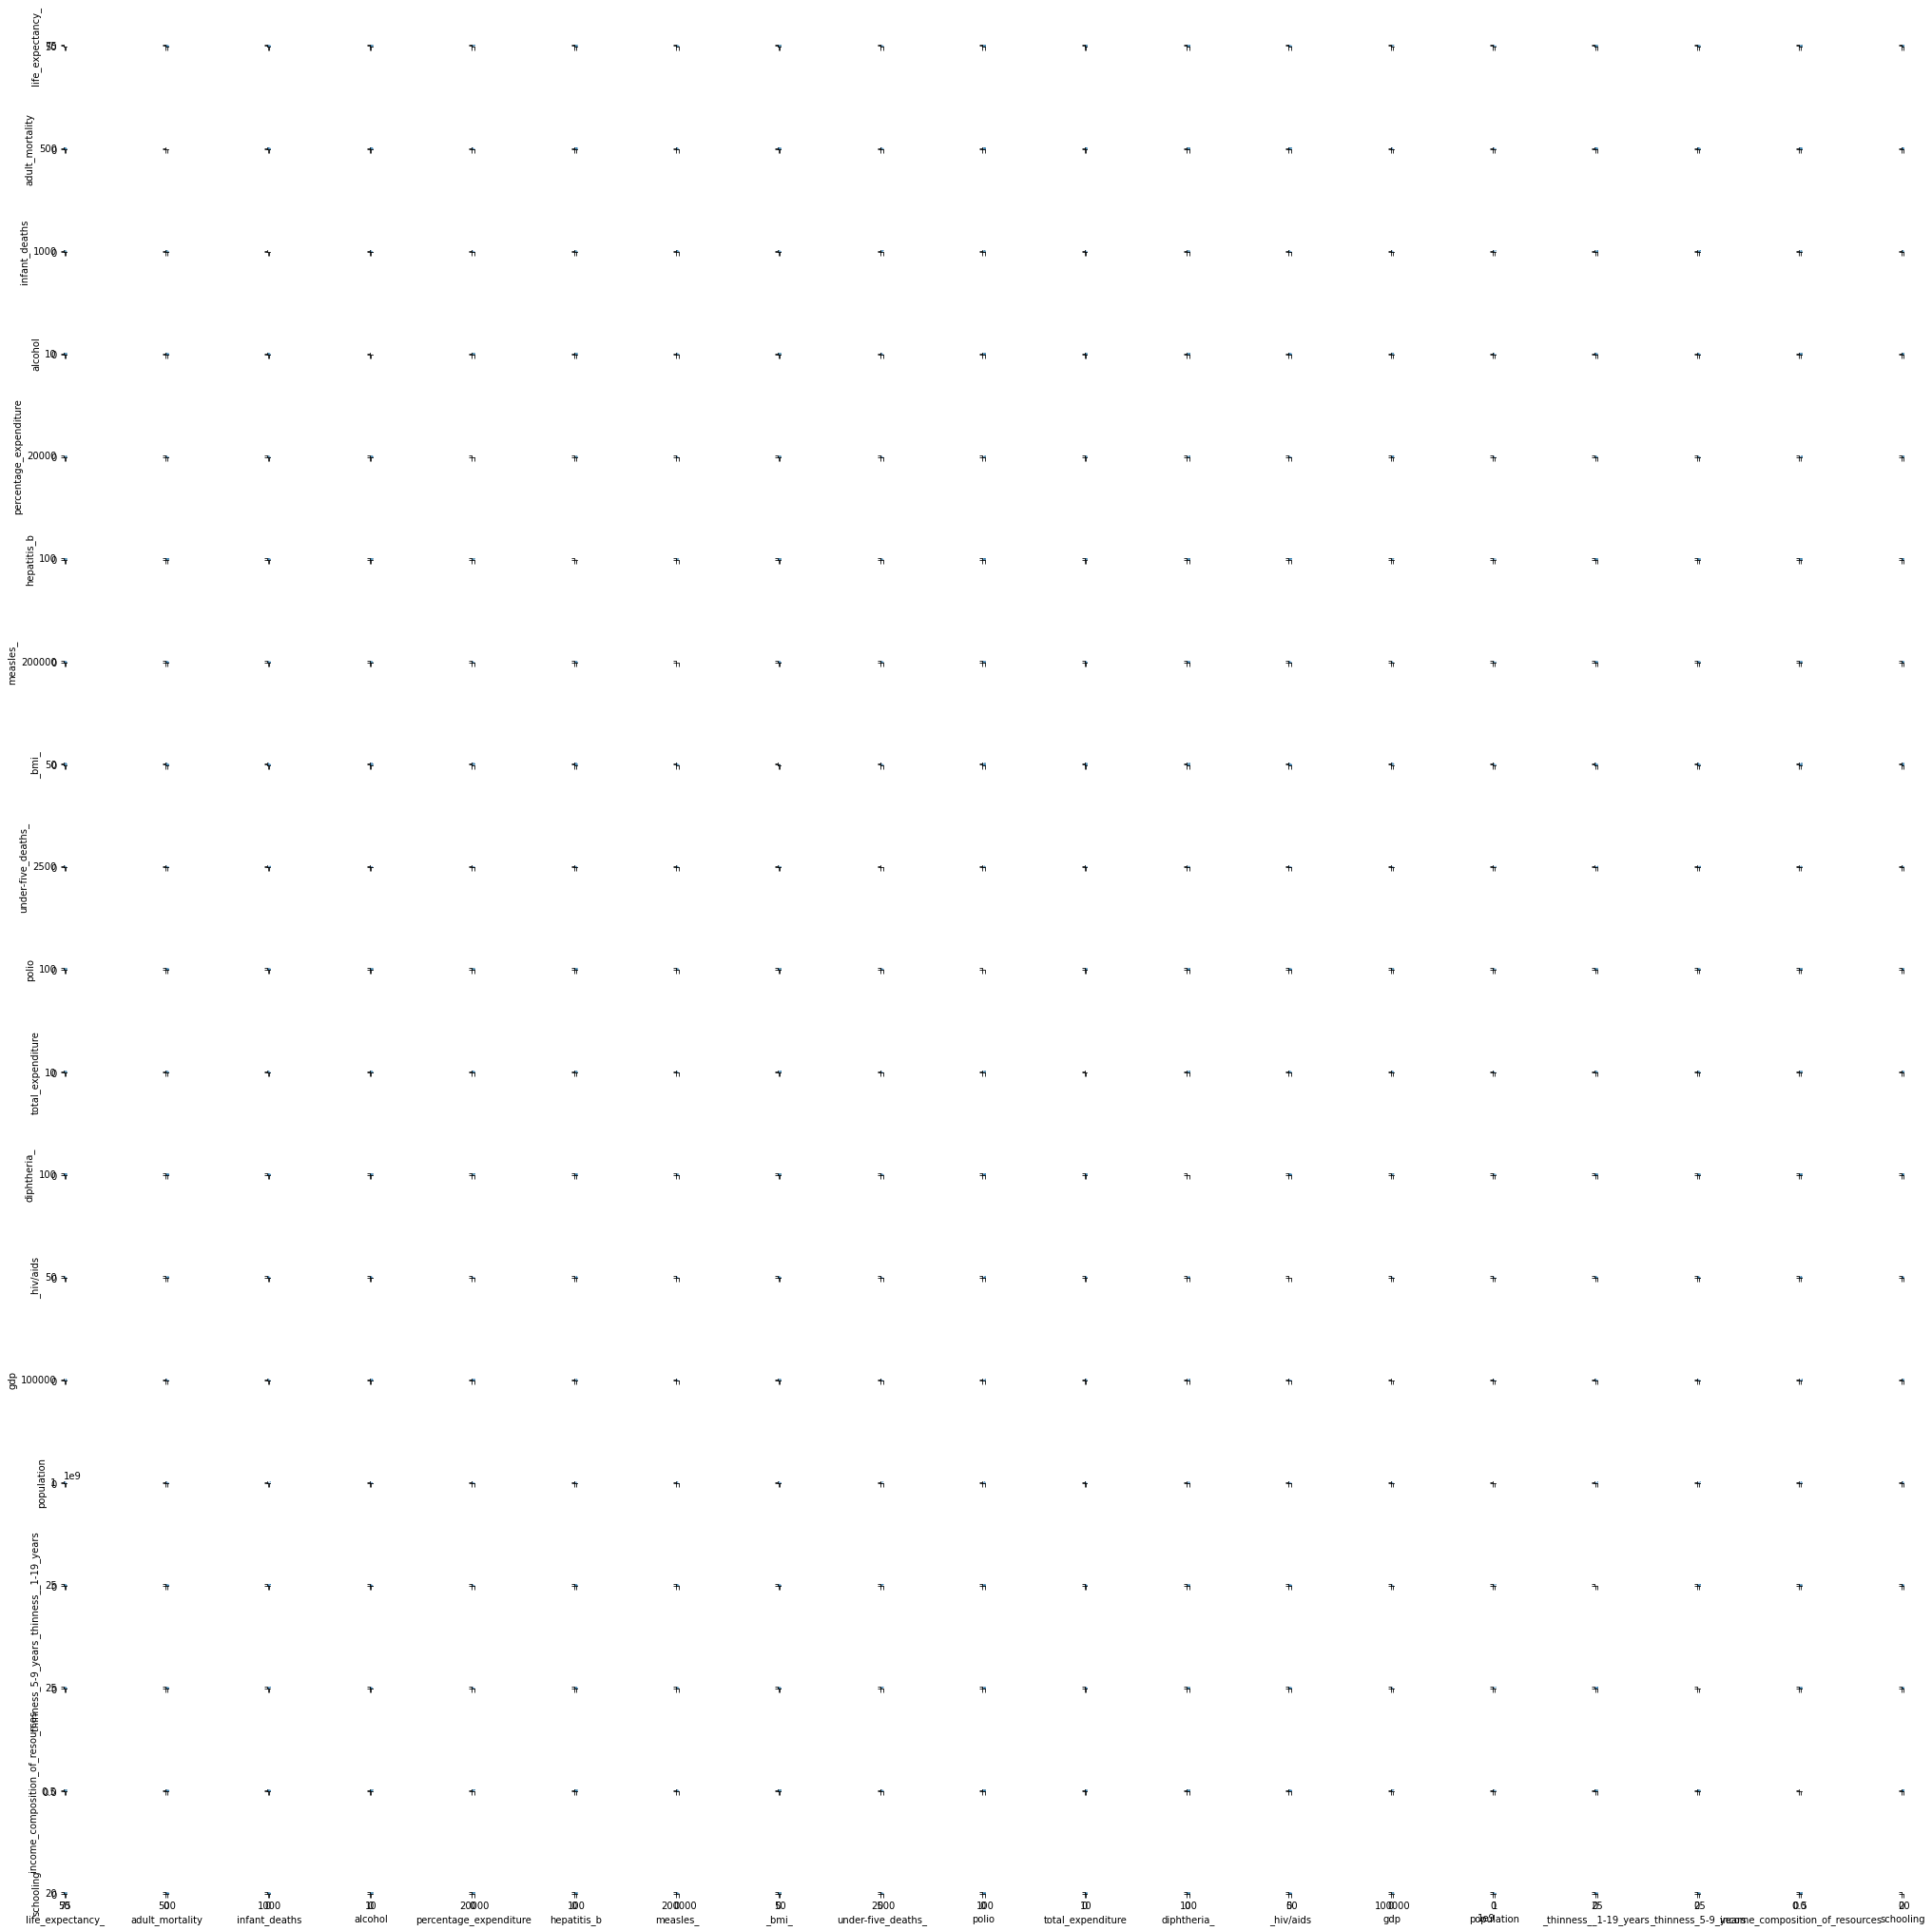

In [42]:
# b) Patterns
# Creates mask to identify numerical features with more or less than 25 unique features
cols_continuous = df.select_dtypes(include="number").nunique() >= 25

# Create a new dataframe which only contains the continuous features
df_continuous = df[cols_continuous[cols_continuous].index]
df_continuous.shape

sns.pairplot(df_continuous, height=1.5, plot_kws={"s": 2, "alpha": 0.2});


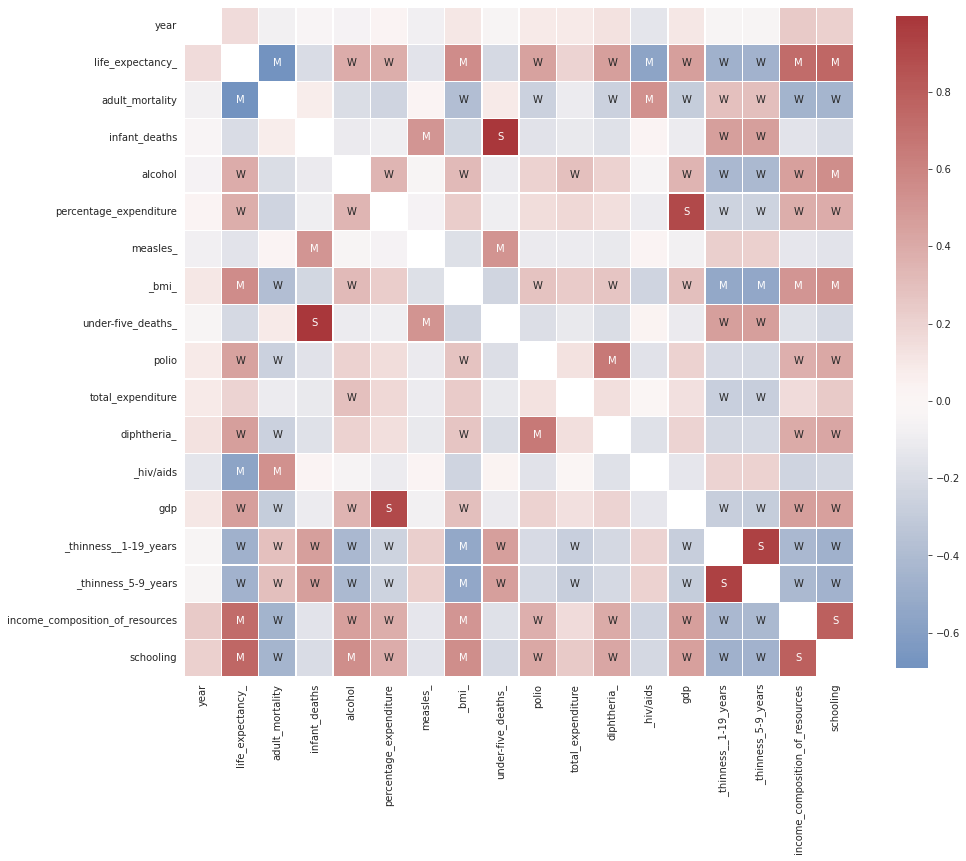

In [ ]:
# Feature Relationships
# Evaluate but remember to consider multicollinearity

# Computes feature correlation
df_corr = df.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});